## Previous configuration

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis
# import os
import sys
sys.path.append("../")

In [ ]:
# Custom imports
from data_loader import load_and_split_data
from src.config_manager import read_config

In [2]:
config = read_config("../config.yaml")
config

{'data': {'train_path': 'data/raw/train.csv',
  'test_path': 'data/raw/test.csv'},
 'base': {'RANDOM_SEED': 20},
 'modeling': {'TARGET_COLUMN': 'SalePrice', 'VALID_SIZE': 0.2},
 'hyperparameters': {'ALPHA_RIDGE': [0.1, 1.0, 10.0],
  'ALPHA_LASSO': [0.001, 0.01, 0.1],
  'ELASTICNET_L1_RATIO': 0.5}}

## Load and split data

In [3]:
X_train, _, y_train, _ = load_and_split_data(config)

In [4]:
print("Shape of X_train:", X_train.shape, "\nShape of y_train:", y_train.shape)

Shape of X_train: (1168, 80) 
Shape of y_train: (1168,)


## Exploratory Data Analysis
### Target: `SalePrice`

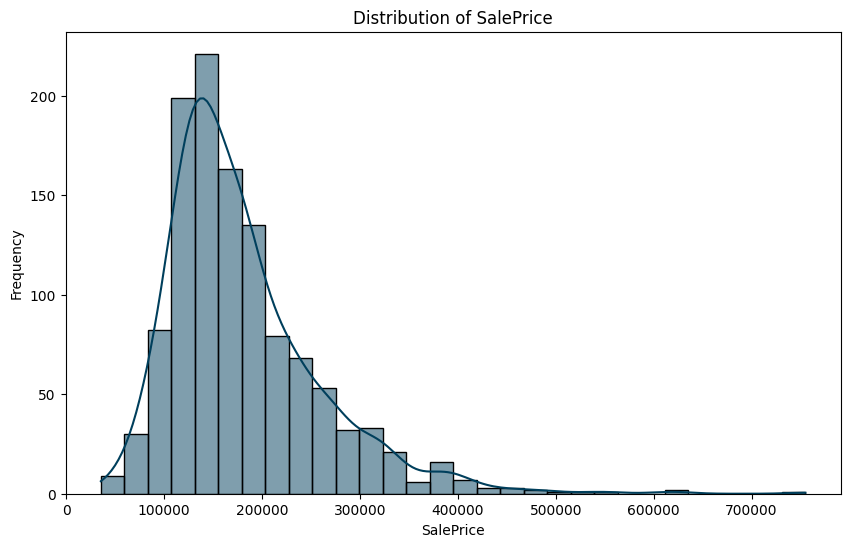

In [18]:
plt.figure(figsize=(10, 6))
sns.histplot(y_train, bins=30, kde=True, color='#003f5c')
plt.title('Distribution of SalePrice')
plt.xlabel('SalePrice')
plt.ylabel('Frequency')
plt.show()

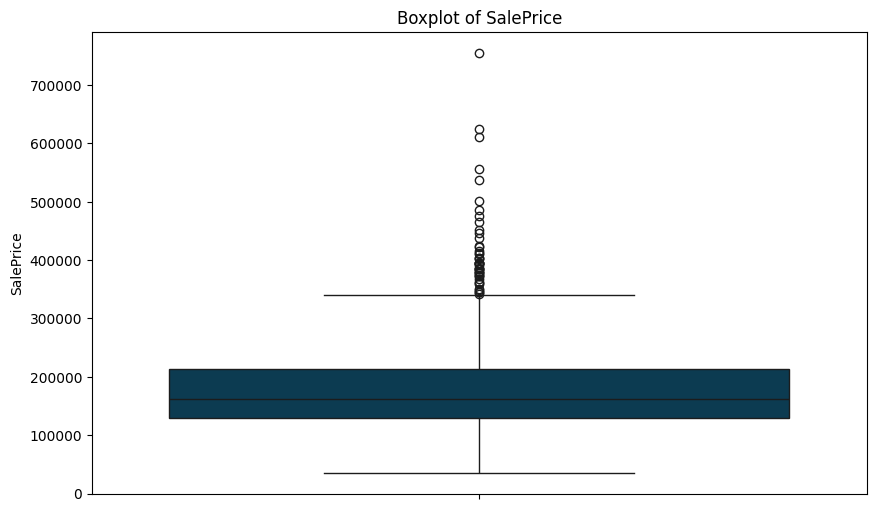

In [19]:
plt.figure(figsize=(10, 6))
sns.boxplot(y=y_train, color='#003f5c')
plt.title('Boxplot of SalePrice')
plt.ylabel('SalePrice')
plt.show()

In [34]:
def calculate_skewness_kurtosis(data):
    skewness = float(skew(data))
    kurt = float(kurtosis(data, fisher=False)) # Use fisher=False to get Pearson's definition (kurtosis of normal distribution = 3)
    
    if skewness > 1:
        skewness_type = "highly positively skewed"
    elif 0.5 < skewness <= 1:
        skewness_type = "moderately positively skewed"
    elif -0.5 <= skewness <= 0.5:
        skewness_type = "approximately symmetric"
    elif -1 <= skewness < -0.5:
        skewness_type = "moderately negatively skewed"
    else:
        skewness_type = "highly negatively skewed"
    
    if kurt > 3:
        kurtosis_type = "leptokurtic"
    elif kurt == 3:
        kurtosis_type = "mesokurtic"
    else:
        kurtosis_type = "platykurtic"

    return {
        "skewness": round(skewness, 2),
        "skewness_type": skewness_type,
        "kurtosis": round(kurt, 2),
        "kurtosis_type": kurtosis_type
    }


In [35]:
calculate_skewness_kurtosis(y_train)

{'skewness': 1.71,
 'skewness_type': 'highly positively skewed',
 'kurtosis': 8.32,
 'kurtosis_type': 'leptokurtic'}

## 